# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [200]:
# 1. Importação de bibliotecas
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [201]:
# 2. Carregamento e visualização inicial dos dados 
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [238]:
# Visualizando as primeiras linhas do meu DataFrame 
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Age
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,71
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,60
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,41
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,44
5,1967,Master,Together,62513.0,0,16,520,42,98,0,42,14,10,6,0,1,58


### Análise 
Após importar as bibliotecas que vamos usar e carregar o nossa arquivo csv em uma tabela DataFreme podemos visualizar as primeiras linhas do nosso conjunto de dados e podemos perceber que a maioria das nossas variavel ja se encontra com o valor numerico, o que facilita a nossa analise, temos apenas duas colunas categorica e posteriormente podemos fazer uma transformação utilizando a tecnico one hotcodingn

In [203]:
# Visualizando as informações básicas do meu DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [204]:
# Visualizando as descriação das minhas colunas númericas 
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25173.076661,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


In [205]:
# Selecionar as colunas númericas 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

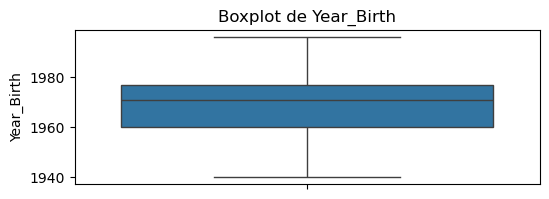

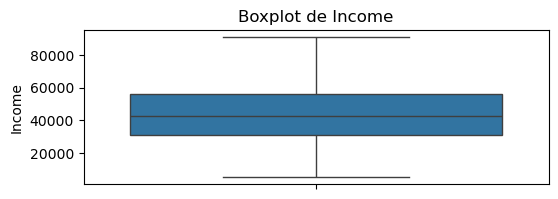

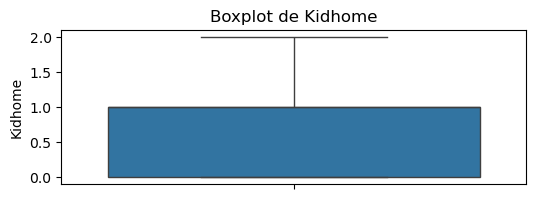

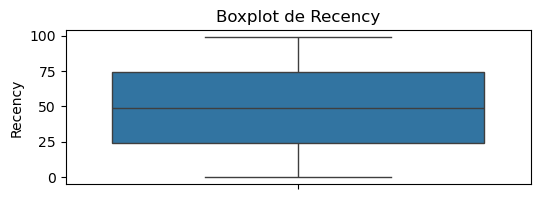

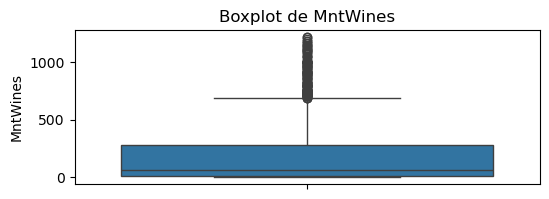

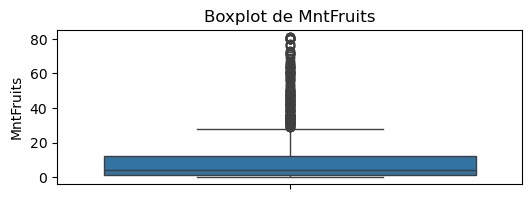

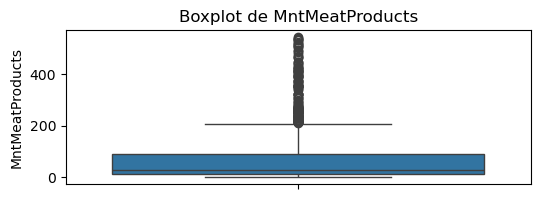

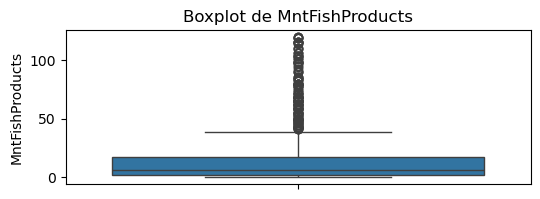

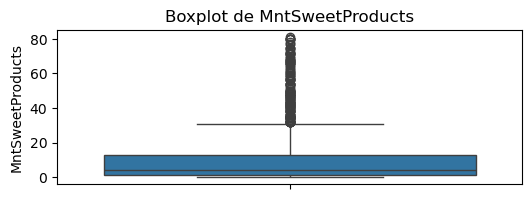

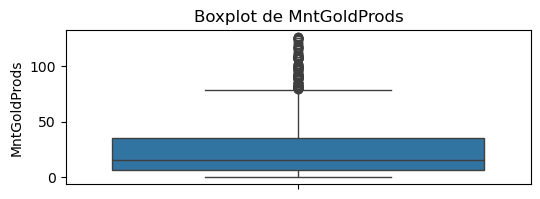

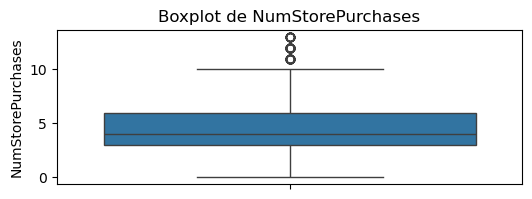

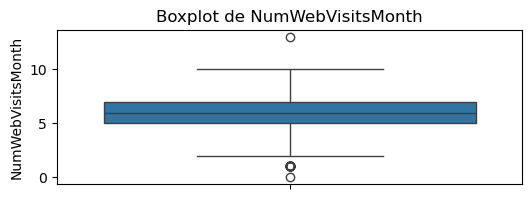

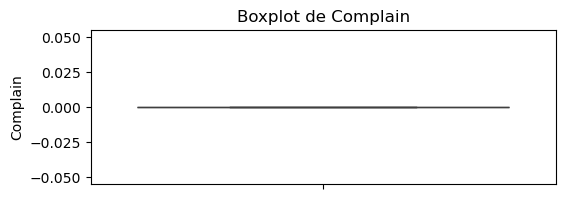

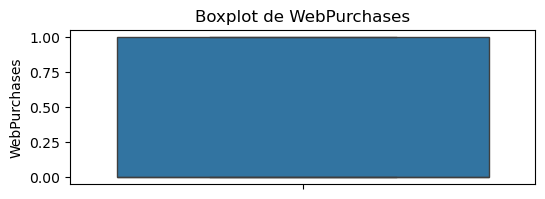

In [241]:
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [207]:
# Salvando a quantidade de linhas antes do tratamento 
linhas_antes = df.shape[0]


Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Mnatém apenas os dados dentro do intervalo permitido para todas as colunas numéricas 
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Salvando a quantidade de linhas após o tratamento 
linhas_depois = df.shape[0]

# Ver quantas foram linhas removidas 
linhas_removidas = linhas_antes - linhas_depois
print(f'Foram removidas {linhas_removidas} linhas com outliers.')

Foram removidas 656 linhas com outliers.


In [208]:
# Verificar os valores faltandes do meu DataFrame 
df.isnull().sum()

Year_Birth            0
Education             0
Marital_Status        0
Income               19
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
dtype: int64

In [209]:
# Preenchendo nossa coluna 'Income' com a mediana 
df['Income'] = df['Income'].fillna(df['Income'].median())

In [210]:
# Criando a vareavel Idade
df['Age'] = 2025- df['Year_Birth']

In [ ]:
# Criando a vareavel total de gastos 
df['TotalSpent'] = df[['MntWines', 'MntFruits',	'MntMeatProducts',	'MntFishProducts',
                       'MntSweetProducts',	'MntGoldProds']].sum(axis=1)

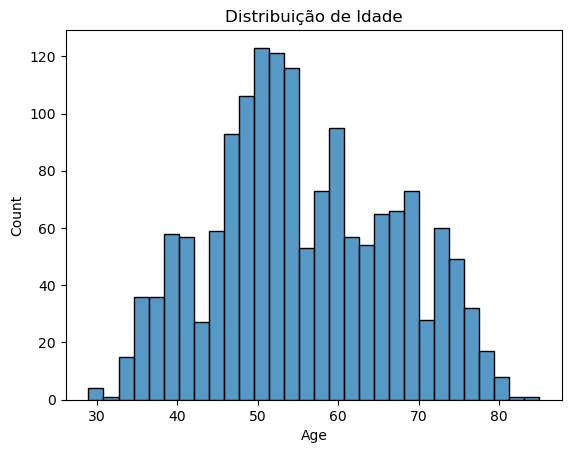

In [211]:
# Idade dos clientes 
sns.histplot(df['Age'], bins=30)
plt.title("Distribuição de Idade")
plt.show()

### Análise 
Podemos perceber que a distribuição da idade dos clientes vai de 20 a 85 e se concentra principalmente entre 45 a 55 anos, depois temos picos como nas idades de 65 e 70 anos aproximadamente 

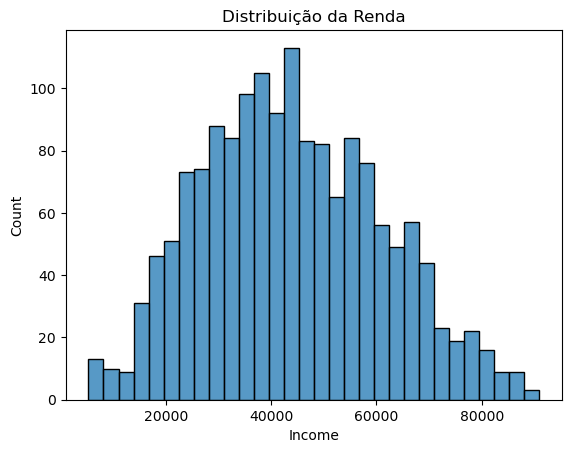

In [213]:
# Renta dos clientes
sns.histplot(df['Income'], bins=30)
plt.title('Distribuição da Renda')
plt.show()

### Análise 
Poemos notar que a renda dos cliente esta concentrada entre 10 a 100 mil indicando lientes com baixa renda

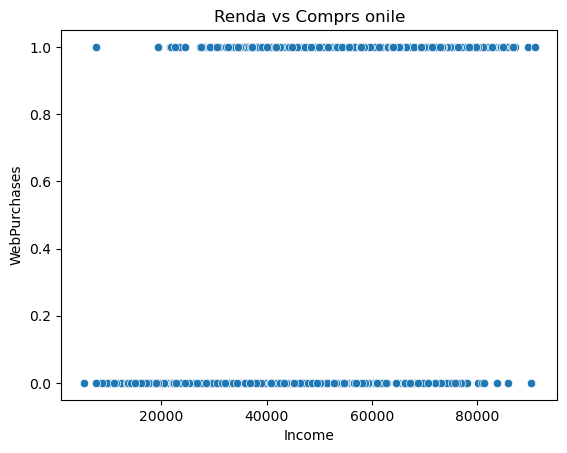

In [215]:
# Relação entre renda e compras onile
sns.scatterplot(x='Income', y='WebPurchases', data=df)
plt.title('Renda vs Comprs onile')
plt.show()

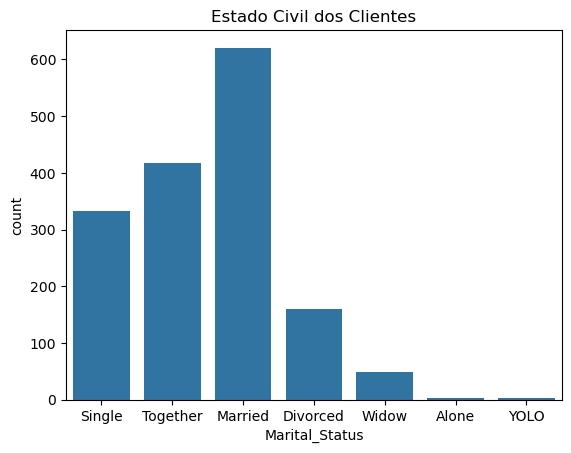

In [216]:
# Estado civil
sns.countplot(x='Marital_Status', data=df)
plt.title('Estado Civil dos Clientes')
plt.show()

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








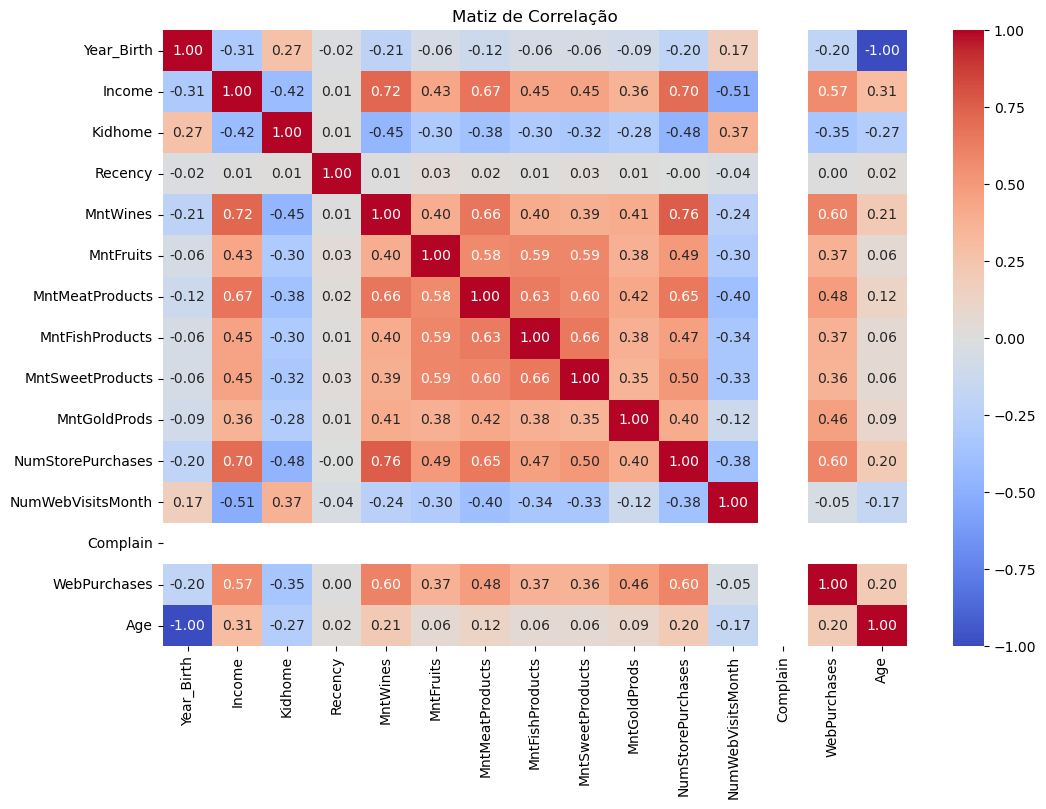

In [218]:
# Matriz de correlação
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matiz de Correlação')
plt.show()          

In [219]:
# Transformando as variaveis tegóricas em numéricas 
df_encoded = pd.get_dummies(df, drop_first=True)

In [220]:
# Separando as dados em X e y 
X = df_encoded.drop('WebPurchases', axis=1)
y = df_encoded['WebPurchases']

In [221]:
# Separando os dados em treino  teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [222]:
# Padronzar os dados 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [224]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Regressão Logística:")
print(classification_report(y_test, y_pred_log))
print("Acurácia:", accuracy_score(y_test, y_pred_log))


Regressão Logística:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       279
           1       0.91      0.78      0.84       197

    accuracy                           0.88       476
   macro avg       0.89      0.86      0.87       476
weighted avg       0.88      0.88      0.88       476

Acurácia: 0.8781512605042017


In [225]:
# Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       279
           1       0.91      0.91      0.91       197

    accuracy                           0.92       476
   macro avg       0.92      0.92      0.92       476
weighted avg       0.92      0.92      0.92       476

Acurácia: 0.9243697478991597


# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

Logistic Regression
Acurácia: 0.9243697478991597
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       279
           1       0.91      0.91      0.91       197

    accuracy                           0.92       476
   macro avg       0.92      0.92      0.92       476
weighted avg       0.92      0.92      0.92       476



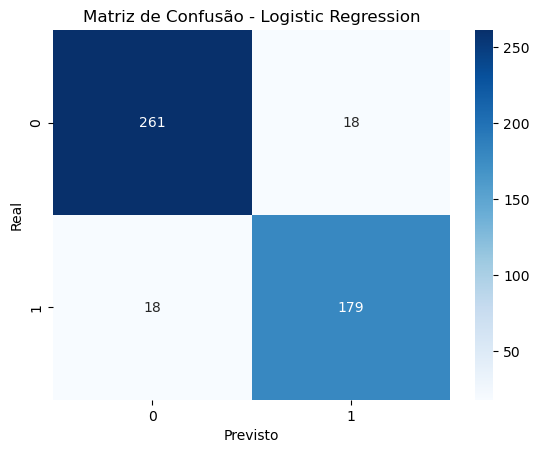

Random Forest
Acurácia: 0.9243697478991597
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       279
           1       0.91      0.91      0.91       197

    accuracy                           0.92       476
   macro avg       0.92      0.92      0.92       476
weighted avg       0.92      0.92      0.92       476



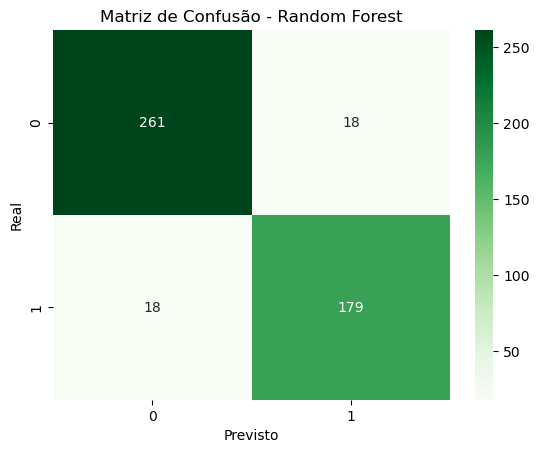

In [235]:
# Logistic Regression
y_pred_lr = rf_model.predict(X_test)
print("Logistic Regression")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Matriz de confusão - Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# -------------------------

# Random Forest (ou outro modelo)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusão - Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


Conclusão:
O modelo Random Forest foi o melhor, pois teve a maior acurácia e conseguiu prever melhor os clientes que realmente compraram. Por isso, escolhi ele como modelo final do projeto.